In [1]:
import data
import models
import cache
import seaborn as sns
import numpy as np
import pandas as pd
import stanity
from stancache import stancache
import plotly.plotly as py
import plotly.graph_objs as go


/home/jacquelineburos/miniconda3/envs/immuneinf/lib/python3.5/site-packages/Cython/Distutils/old_build_ext.py:30: UserWarning: Cython.Distutils.old_build_ext does not properly handle dependencies and is deprecated.
  "Cython.Distutils.old_build_ext does not properly handle dependencies "
INFO:stancache.seed:Setting seed to 1245502385
INFO:root:Setting CACHE_DIR = /mnt/modelcache/immune-infiltrate-explorations
INFO:stancache.seed:Setting seed to 1245502385
INFO:requests.packages.urllib3.connectionpool:Starting new HTTPS connection (1): api.plot.ly


In [2]:
sns.set(context='talk')

In [3]:
model_name = 'model5.3'
by = 'cell_type'
sample_n = 500
cache_only = True

## get data, as we did in earlier examples

This will help in case we want to compare estimates for particular genes or samples

In [4]:
sample_df = cache.cached(models.prep_sample_df, sample_n=sample_n)

INFO:stancache.stancache:prep_sample_df: cache_filename set to prep_sample_df.cached.sample_n_500.pkl
INFO:stancache.stancache:prep_sample_df: Loading result from cache


In [5]:
stan_data1 = models.prep_stan_data(sample_df, by=by, nu=1)
stan_data2 = models.prep_stan_data(sample_df, by=by, nu=2)
stan_data3 = models.prep_stan_data(sample_df, by=by, nu=3)
stan_data4 = models.prep_stan_data(sample_df, by=by, nu=4)
stan_data5 = models.prep_stan_data(sample_df, by=by, nu=5)
stan_data6 = models.prep_stan_data(sample_df, by=by, nu=6)

In [6]:
model = models.get_model_file(model_name=model_name)

## get models from cache

In [7]:
fit_nu1 = models.cached_stan_fit(file=model,
                              data=stan_data1,
                              model_name=model_name,
                              cache_only=cache_only)
fit_nu1_prefix = stancache.cached_stan_file(file=model, data=stan_data1, model_name=model_name, prefix_only=True)
fit_nu1_prefix

INFO:stancache.stancache:Step 1: Get compiled model code, possibly from cache
INFO:stancache.stancache:StanModel: cache_filename set to model5_3.cython_0_25_1.model_code_14305693679620668006.pystan_2_12_0_0.stanmodel.pkl
INFO:stancache.stancache:StanModel: Loading result from cache
INFO:stancache.stancache:Step 2: Get posterior draws from model, possibly from cache
INFO:stancache.stancache:sampling: cache_filename set to model5_3.cython_0_25_1.model_code_14305693679620668006.pystan_2_12_0_0.stanfit.chains_4.data_91407559365.iter_2000.seed_1245502385.pkl
INFO:stancache.stancache:sampling: Loading result from cache


'model5_3.cython_0_25_1.model_code_14305693679620668006.pystan_2_12_0_0.stanfit.data_91407559365'

In [8]:
fit_nu2 = models.cached_stan_fit(file=model, data=stan_data2, model_name=model_name, cache_only=cache_only)
fit_nu2_prefix = stancache.cached_stan_file(file=model, data=stan_data2, model_name=model_name, prefix_only=True)
fit_nu2_prefix

INFO:stancache.stancache:Step 1: Get compiled model code, possibly from cache
INFO:stancache.stancache:StanModel: cache_filename set to model5_3.cython_0_25_1.model_code_14305693679620668006.pystan_2_12_0_0.stanmodel.pkl
INFO:stancache.stancache:StanModel: Loading result from cache
INFO:stancache.stancache:Step 2: Get posterior draws from model, possibly from cache
INFO:stancache.stancache:sampling: cache_filename set to model5_3.cython_0_25_1.model_code_14305693679620668006.pystan_2_12_0_0.stanfit.chains_4.data_1761197307.iter_2000.seed_1245502385.pkl
INFO:stancache.stancache:sampling: Loading result from cache


'model5_3.cython_0_25_1.model_code_14305693679620668006.pystan_2_12_0_0.stanfit.data_1761197307'

In [9]:
fit_nu3 = models.cached_stan_fit(file=model, data=stan_data3, model_name=model_name, cache_only=cache_only)
fit_nu3_prefix = stancache.cached_stan_file(file=model, data=stan_data3, model_name=model_name, prefix_only=True)
fit_nu3_prefix

INFO:stancache.stancache:Step 1: Get compiled model code, possibly from cache
INFO:stancache.stancache:StanModel: cache_filename set to model5_3.cython_0_25_1.model_code_14305693679620668006.pystan_2_12_0_0.stanmodel.pkl
INFO:stancache.stancache:StanModel: Loading result from cache
INFO:stancache.stancache:Step 2: Get posterior draws from model, possibly from cache
INFO:stancache.stancache:sampling: cache_filename set to model5_3.cython_0_25_1.model_code_14305693679620668006.pystan_2_12_0_0.stanfit.chains_4.data_99566643705.iter_2000.seed_1245502385.pkl
INFO:stancache.stancache:sampling: Loading result from cache


'model5_3.cython_0_25_1.model_code_14305693679620668006.pystan_2_12_0_0.stanfit.data_99566643705'

In [ ]:
fit_nu4 = models.cached_stan_fit(file=model, data=stan_data4, model_name=model_name, cache_only=cache_only)
fit_nu4_prefix = stancache.cached_stan_file(file=model, data=stan_data4, model_name=model_name, prefix_only=True)
fit_nu4_prefix

In [ ]:
fit_nu5 = models.cached_stan_fit(file=model, data=stan_data5, model_name=model_name, cache_only=cache_only)
fit_nu5_prefix = stancache.cached_stan_file(file=model, data=stan_data5, model_name=model_name, prefix_only=True)
fit_nu5_prefix

In [ ]:
fit_nu6 = models.cached_stan_fit(file=model, data=stan_data6, model_name=model_name, cache_only=cache_only)
fit_nu6_prefix = stancache.cached_stan_file(file=model, data=stan_data6, model_name=model_name, prefix_only=True)
fit_nu6_prefix

## compute loo-psis for each model

In [10]:
loo_nu1 = cache.cached(stanity.psisloo,
                        log_likelihood=fit_nu1.extract('log_lik')['log_lik'],
                    cache_filename='{}.loo.pkl'.format(fit_nu1_prefix))
loo_nu1.print_summary()

INFO:stancache.stancache:psisloo: cache_filename set to model5_3.cython_0_25_1.model_code_14305693679620668006.pystan_2_12_0_0.stanfit.data_91407559365.loo.pkl
INFO:stancache.stancache:psisloo: Loading result from cache


greater than 0.5    0.006254
greater than 1      0.000794
dtype: float64

In [11]:
loo_nu2 = cache.cached(stanity.psisloo,
                      log_likelihood=fit_nu2.extract('log_lik')['log_lik'],
                      cache_filename='{}.loo.pkl'.format(fit_nu2_prefix))
loo_nu2.print_summary()

INFO:stancache.stancache:psisloo: cache_filename set to model5_3.cython_0_25_1.model_code_14305693679620668006.pystan_2_12_0_0.stanfit.data_1761197307.loo.pkl
INFO:stancache.stancache:psisloo: Loading result from cache


greater than 0.5    0.006127
greater than 1      0.000825
dtype: float64

In [12]:
loo_nu3 = cache.cached(stanity.psisloo,
                      log_likelihood=fit_nu3.extract('log_lik')['log_lik'],
                      cache_filename='{}.loo.pkl'.format(fit_nu3_prefix))
loo_nu3.print_summary()

INFO:stancache.stancache:psisloo: cache_filename set to model5_3.cython_0_25_1.model_code_14305693679620668006.pystan_2_12_0_0.stanfit.data_99566643705.loo.pkl
INFO:stancache.stancache:psisloo: Loading result from cache


greater than 0.5    0.006762
greater than 1      0.000730
dtype: float64

In [ ]:
loo_nu4 = cache.cached(stanity.psisloo,
                      log_likelihood=fit_nu4.extract('log_lik')['log_lik'],
                      cache_filename='{}.loo.pkl'.format(fit_nu4_prefix))
loo_nu4.print_summary()

In [ ]:
loo_nu5 = cache.cached(stanity.psisloo,
                      log_likelihood=fit_nu5.extract('log_lik')['log_lik'],
                      cache_filename='{}.loo.pkl'.format(fit_nu5_prefix))
loo_nu5.print_summary()

In [ ]:
loo_nu6 = cache.cached(stanity.psisloo,
                      log_likelihood=fit_nu6.extract('log_lik')['log_lik'],
                      cache_filename='{}.loo.pkl'.format(fit_nu6_prefix))
loo_nu6.print_summary()

## compare psis-loo for nu==1 vs nu==2

In [13]:
stanity.loo_compare(loo_nu1, loo_nu2)

{'diff': 2.1759834700438052, 'se_diff': 4.5965214468711153}

## compare psis-loo for nu==2 vs nu==3

In [14]:
stanity.loo_compare(loo_nu2, loo_nu3)

{'diff': -1.9233430405351841, 'se_diff': 2.9297270261242754}

## compare psis-loo for nu==3 vs nu==4

In [15]:
stanity.loo_compare(loo_nu3, loo_nu4)

NameError: name 'loo_nu4' is not defined

## compare psis-loo for nu==4 vs nu==5

In [ ]:
stanity.loo_compare(loo_nu4, loo_nu5)

## compare psis-loo for nu==5 vs nu==6

In [ ]:
stanity.loo_compare(loo_nu5, loo_nu6)

## Summarize fit across different values of `nu`

In [20]:
loo_results = {1: loo_nu1, 2: loo_nu2, 3: loo_nu3,
               #4: loo_nu4,
               #5: loo_nu5, 6: loo_nu6
              }

In [21]:
loodf = list()
for (nu, loores) in loo_results.items():
    thisdf = loores.pointwise.reset_index()
    thisdf['nu'] = nu
    loodf.append(thisdf)
loodf = pd.concat(loodf)
loodf.head()

,index,pareto_k,pointwise_elpd,nu
0,0,-0.203212,-7.777531,1
1,1,-0.057378,-8.231102,1
2,2,-0.084060,-7.723267,1
3,3,-0.098974,-7.624086,1
4,4,-0.158164,-7.707857,1


In [22]:
loodf.sort_values(['index','nu'], inplace=True)
loodf['first_diff'] = loodf.groupby('index')['pointwise_elpd'].diff()
loodf.fillna(0, inplace=True)
loodf['cum_diff'] = loodf.groupby('index')['first_diff'].cumsum()
loodf.head()

,index,pareto_k,pointwise_elpd,nu,first_diff,cum_diff
0,0,-0.203212,-7.777531,1,0.000000,0.000000
0,0,-0.097558,-7.780275,2,-0.002744,-0.002744
0,0,-0.145188,-7.781545,3,-0.001270,-0.004014
1,1,-0.057378,-8.231102,1,0.000000,0.000000
1,1,-0.026185,-8.228080,2,0.003022,0.003022


In [23]:
loodf2 = pd.merge(sample_df, loodf, on='index')

## plot ELPD by `nu`

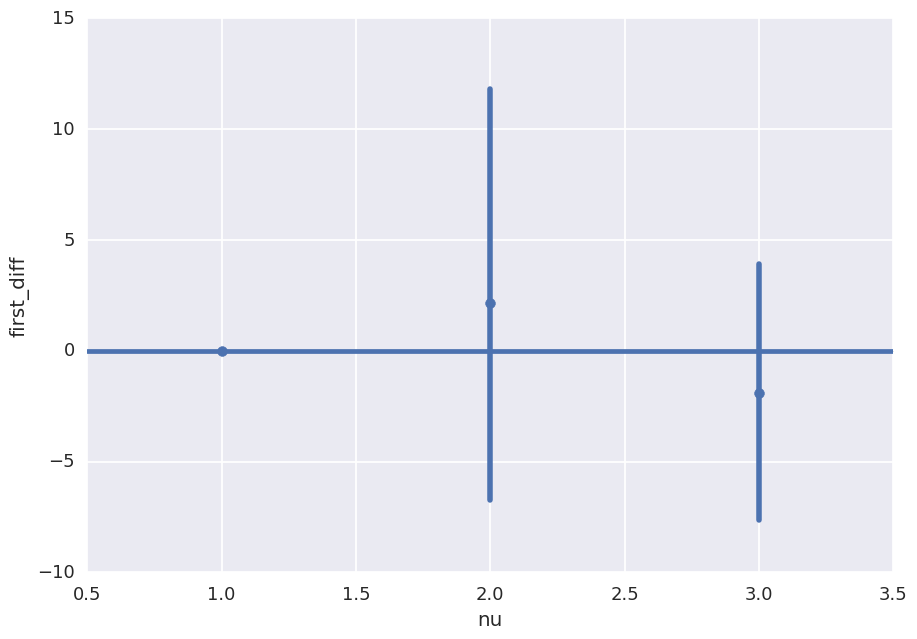

In [24]:
sns.regplot(data=loodf2, x='nu', y='first_diff', x_estimator=np.sum)

KeyboardInterrupt: 

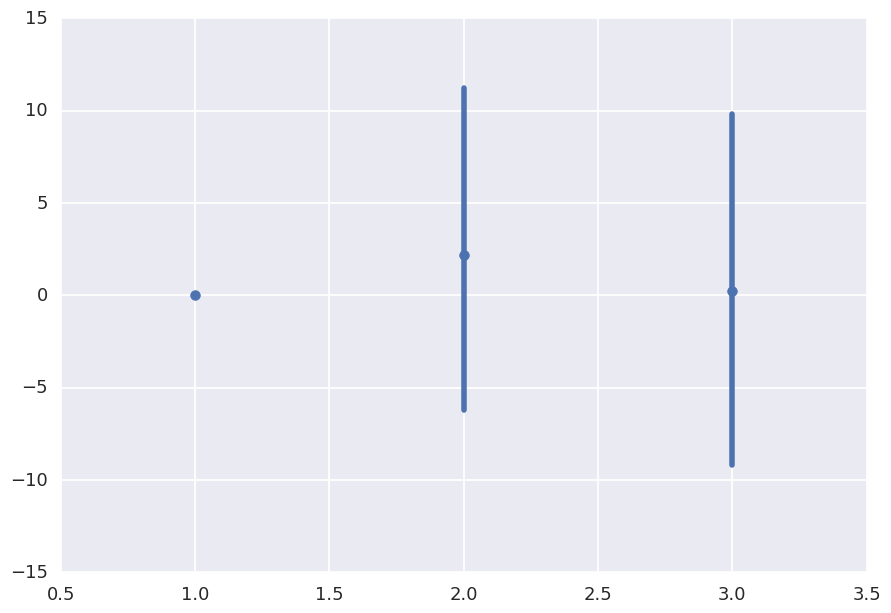

In [25]:
sns.regplot(data=loodf2, x='nu', y='cum_diff', x_estimator=np.sum)

In [ ]:
by_nu = loodf2.groupby(['nu'])['cum_diff'].sum().reset_index()
trace = go.Scatter(
    x=by_nu['nu'],
    y=by_nu['cum_diff'],
    mode='markers+lines',
    line=dict(
        shape='spline'
    ),
)
py.iplot([trace])

INFO:requests.packages.urllib3.connectionpool:Starting new HTTPS connection (1): plot.ly


## plot ELPD by observation over different values of `nu`

In [ ]:
from matplotlib import pyplot as plt
for i in np.arange(max(loodf.index)):
    plt.plot(loodf.loc[loodf['index'] == i, 'nu'],
             loodf.loc[loodf['index'] == i, 'first_diff'],
             alpha=0.2)


## plot `elpd` by cell_type

In [ ]:
by_subset = loodf2.groupby(['cell_type','nu']).agg({'first_diff': np.sum, 'cum_diff': np.sum}).reset_index()
plot_data = list()
for (name, sample_df) in by_subset.groupby('cell_type'):
    trace = go.Scatter(
        x=sample_df['nu'],
        y=sample_df['cum_diff'],
        mode='markers+lines',
        name=name,
        line=dict(
            shape='spline'
        ),
    )
    plot_data.append(trace)
py.iplot(plot_data, filename='immune-inf/elpd-by-cell_type')

## plot elpd by `SubSet`

Is there any pattern in how errors are distributed by SubSet?

In [ ]:
by_subset = loodf2.groupby(['SubSet','nu']).agg({'first_diff': np.sum, 'cum_diff': np.sum}).reset_index()
plot_data = list()
for (name, sample_df) in by_subset.groupby('SubSet'):
    trace = go.Scatter(
        x=sample_df['nu'],
        y=sample_df['cum_diff'],
        mode='markers+lines',
        name=name,
        line=dict(
            shape='spline'
        ),
    )
    plot_data.append(trace)
py.iplot(plot_data, filename='immune-inf/elpd-by-subset')

## look at elpd over `nu`, by sample_id

In [ ]:
by_sample = loodf2.groupby(['sample_id', 'SubSet', 'nu'])['first_diff'].sum().reset_index()
plot_data = list()
for (sample_id, sample_df) in by_sample.groupby('sample_id'):
    trace = go.Scatter(
        x=sample_df['nu'],
        y=sample_df['first_diff'],
        mode='lines',
        name=sample_df['SubSet'].values[0],
        text=sample_id,
        hoverinfo='text+name',
        line=dict(
            shape='linear'
        ),
        legendgroup=sample_df['SubSet'].values[0],
        opacity=0.2,
    )
    plot_data.append(trace)

In [ ]:
py.iplot(plot_data)